<a href="https://colab.research.google.com/github/LaizaCostaa/insights_vendas_imoveis/blob/main/insights_vendas_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONTEXTO** 


A House Rocket é uma plataforma digital que tem como modelo de negócio a compra e venda de imóveis usando tecnologia.


O objetivo deste projeto é ajudar a empresa encontrar as melhores oportunidades de negócio no mercado de imóveis, visando maximizar seus lucros


A principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.


Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços. Portanto, nessa análise, buscaremos responder as seguinte perguntas:


1.	Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
2.	Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
3.	A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças?"


**METADADOS**




* 	bathrooms: Número de banheiros, onde .5 representa um quarto com vaso sanitário, mas sem chuveiro.
*   bedrooms: Número de quartos.
*   condition: Índice de 1 a 5 que indica a condição do apartamento.
*   date: Data da venda do imóvel.
*   floors: Número de andares.
*   grade: Índice de 1 a 13 que indica a qualidade da construção e do design.
*   lat: Latitude.
*   long: Longitude.
*   price: Preço de venda de cada imóvel.
*   sqft_above: Metragem quadrada do espaço interno habitável acima do nível do solo.
*   sqft_basement: Metragem quadrada do espaço interno habitável abaixo do nível do solo.
*   sqft_living: Metragem quadrada do espaço interno habitável do apartamento.
*   sqft_living15: Metragem quadrada do espaço interno habitável das 15 residências vizinhas mais próximas.
*   sqft_lot: Metragem quadrada do terreno.
*   sqft_lot15: Metragem quadrada dos terrenos das 15 residências vizinhas mais próximas.
*   view: Índice de 0 a 4 que indica a qualidade da vista da propriedade.
*   waterfront: Variável binária que indica se o apartamento tem vista para a orla marítima.
*   yr_built: Ano em que a casa foi construída.
*   yr_renovated: Ano da última reforma da casa.
*   zipcode: Área do código postal em que a casa está localizada.


verified from 2 sources:
https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices
https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.htm



In [147]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.tsa as sta

In [148]:

# ler o csv
df = pd.read_csv("/content/kc_house_data.csv")
display(df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [149]:
df.shape

(21613, 21)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [151]:
pd.DataFrame(df['price'].describe())

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


In [152]:
df1 = df.copy()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

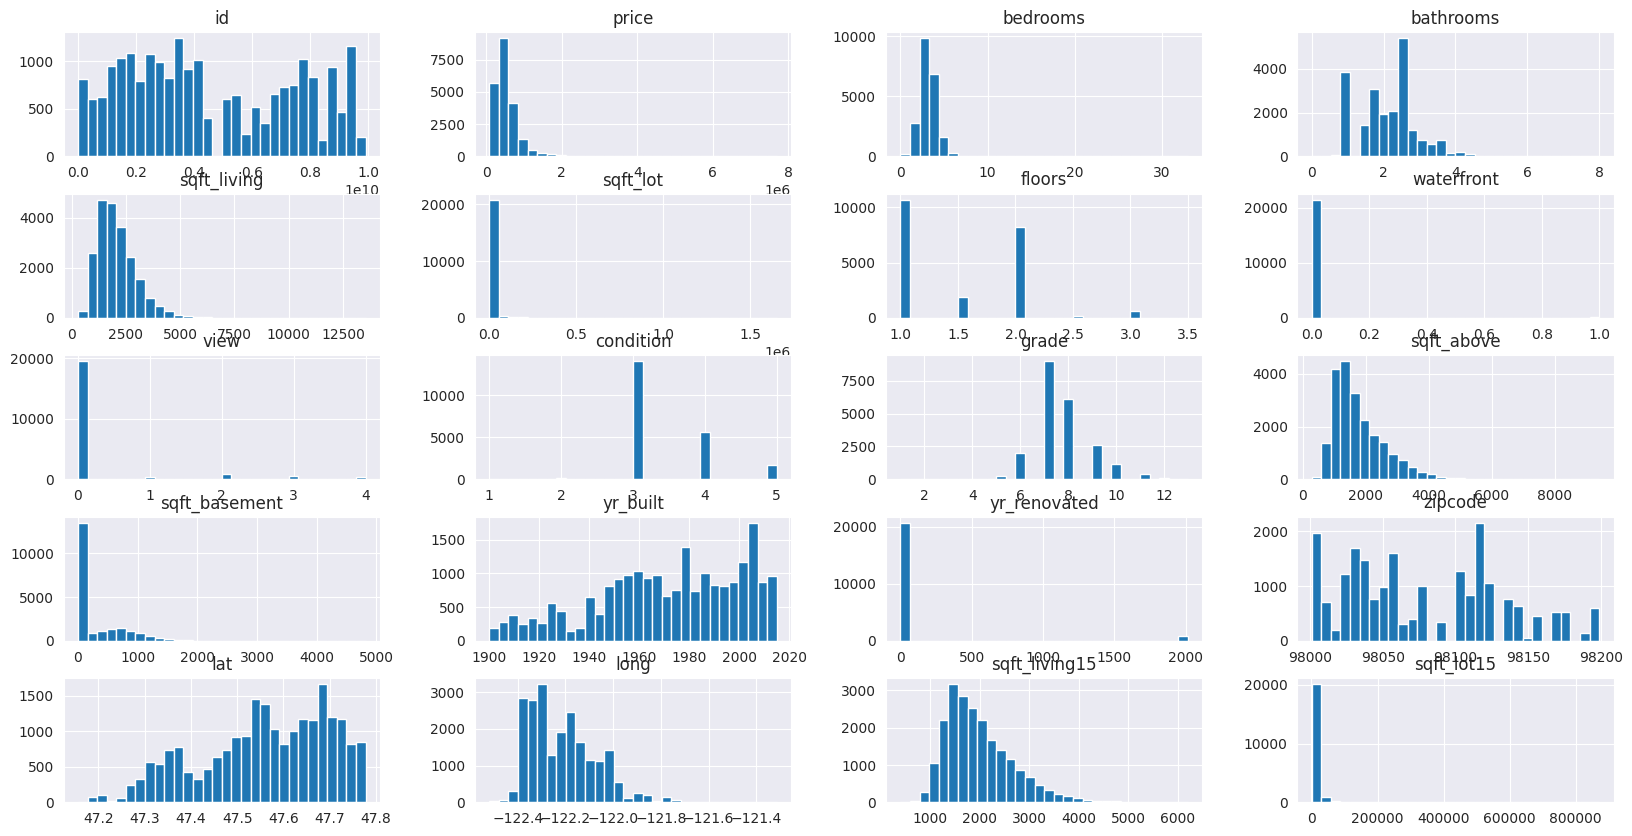

In [153]:
df1.hist(bins=30, figsize=(20,10))

In [154]:
df1['price'].median()

450000.0

In [155]:
pd.DataFrame(df1['condition'].value_counts().sort_index())

,condition
1,30
2,172
3,14031
4,5679
5,1701


**Condições:**
* ruim (1-2)
* razoável (3)
* boa (4)
* excelente (5)


Há muitas casas em condições razoáveis e boas, menos casas em condições excelntes e poucas casas em condições ruins

In [156]:
pd.DataFrame(df1['grade'].value_counts().sort_index())

,grade
1,1
3,3
4,29
5,242
6,2038
7,8981
8,6068
9,2615
10,1134
11,399


**Grade:**


*  1-3 = AQUÉM da construção e design de edifício

* 7 = nível MÉDIO de construção e design 

* 11-13 =  ALTO nível de qualidade de construção e design.

A maioria dos imóveis estão com grade 7 (nível médio). Após o nível sete, a quantidade vai caindo, de modo que entre 9 e 10 há uma quantidade mais baixa, e entre 11 e 13 há pouquissimas casas. Ou seja a maioria está em condições médias de construção e design, e pouquíssimas em nível alto.

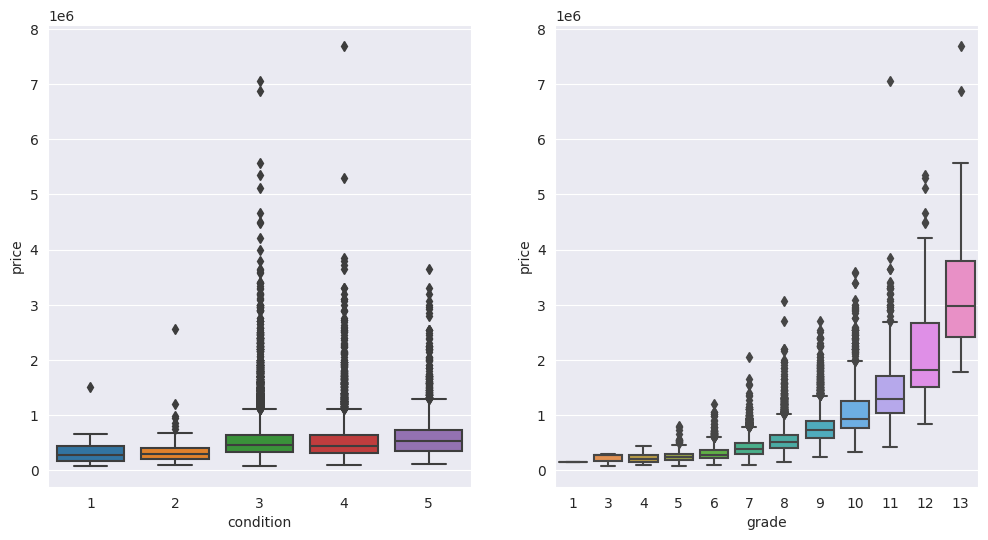

In [157]:
#verificando se há correlação entre as variáveis condition, grade e price


plt.figure(figsize=[12, 6])

plt.subplot(121)
sns.boxplot(x='condition', y='price', data=df1);

plt.subplot(122)
sns.boxplot(x='grade', y='price', data=df1)

plt.show()

A mediana da variável price parece não variar muito em relação à "condition". Já a variável "grade" parece influenciar bastante no preço dos imóveis



<ipython-input-158-c62145560a73>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr = df1.corr()
<ipython-input-158-c62145560a73>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="magma")


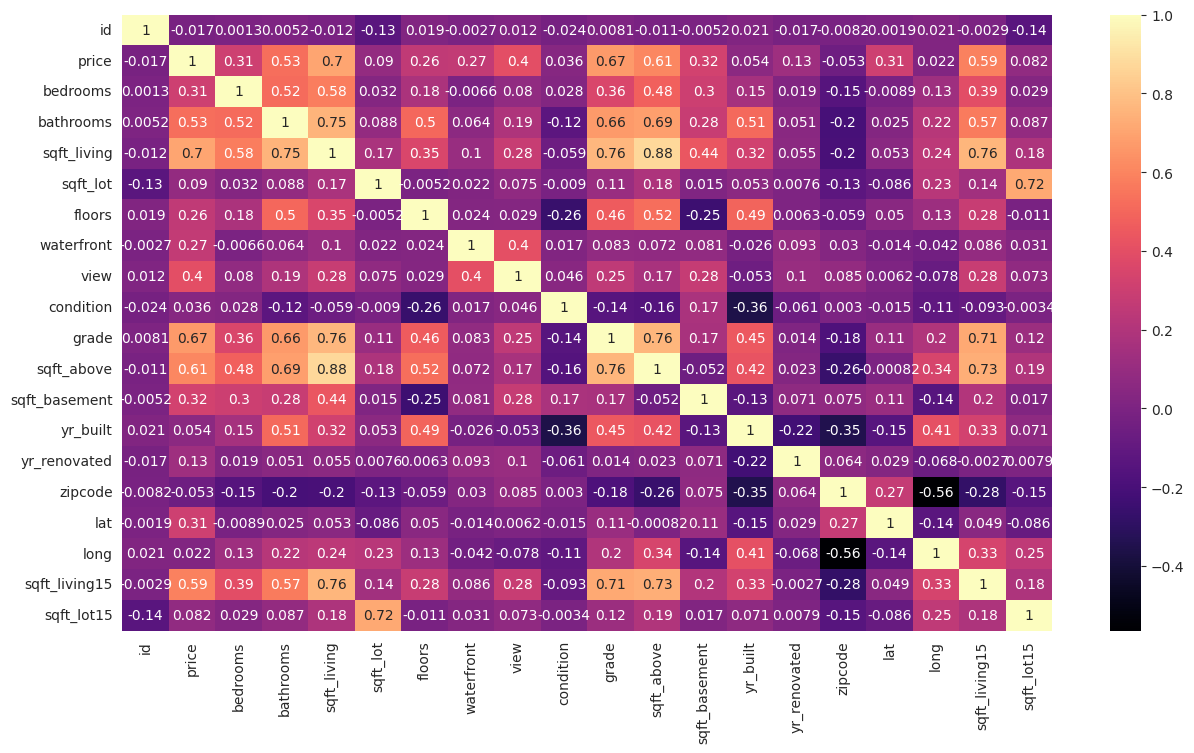

In [158]:
# Calcula a matriz de correlação
matriz_corr = df1.corr()

plt.subplots(figsize=(15,8))  
sns.heatmap(df.corr(), annot=True, cmap="magma")
plt.show()

O fato de o cálculo de correlação linear trabalhar com variáveis quantitativas, 
pode explicar, por exemplo, o porquê de as variáveis de localização ("lat", "long", "zipcode") não apresentarem uma correlação alta,já que são variáveis categóricas. É amplamente reconhecido que a localização desempenha um papel fundamental na determinação dos preços imobiliários. 

Um gráfico geográfico permite visualizar de forma mais intuitiva como os preços dos imóveis estão distribuídos em diferentes áreas geográficas. (Mostrarei isso mais adiante)

In [159]:
#verificando as relações das variáveis com preço
correlacao_preco = df1.corr()['price'].sort_values(ascending=False).round(5)
print(correlacao_preco) 

price            1.00000
sqft_living      0.70204
grade            0.66743
sqft_above       0.60557
sqft_living15    0.58538
bathrooms        0.52514
view             0.39729
sqft_basement    0.32382
bedrooms         0.30835
lat              0.30700
waterfront       0.26637
floors           0.25679
yr_renovated     0.12643
sqft_lot         0.08966
sqft_lot15       0.08245
yr_built         0.05401
condition        0.03636
long             0.02163
id              -0.01676
zipcode         -0.05320
Name: price, dtype: float64


<ipython-input-159-71afce38ff66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_preco = df1.corr()['price'].sort_values(ascending=False).round(5)


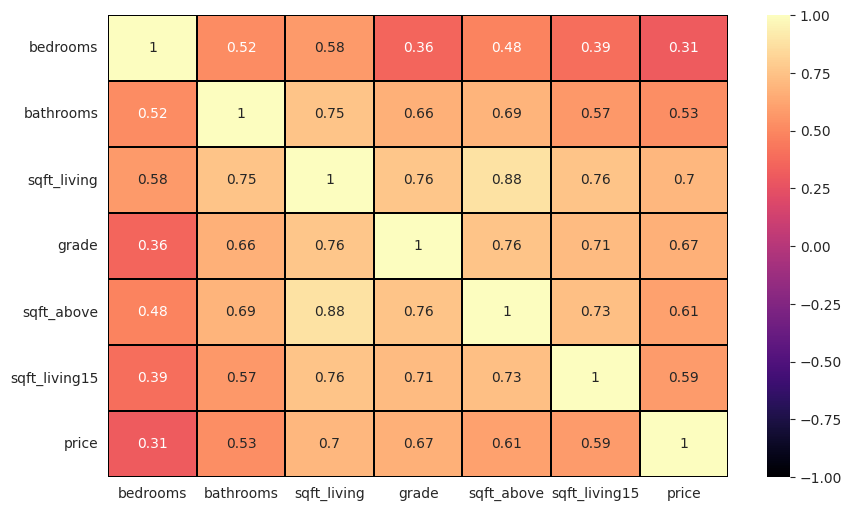

In [160]:
'''analisando as vaqriáveis que possuem correlação maior que 0.5 e
 menor que -0.5 (bathrooms, sqft_living, grade, sqft_above e sqft_living15)'''


colunas = df1[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
                         'sqft_living15', 'price']]
correlacao_maior = colunas.corr()

plt.figure (figsize=[10, 6])
sns.heatmap(data = correlacao_maior, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='magma', annot=True)

plt.show()

<ipython-input-161-e360d793c64c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()['price'].sort_values(ascending=False)


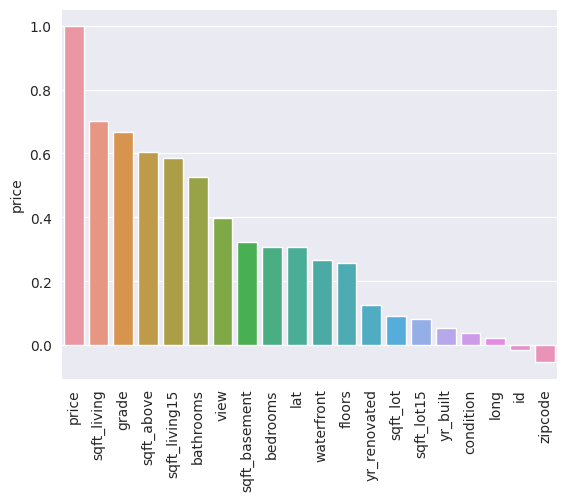

In [161]:
# Organizando essas correlações em uma hierarquia

corr = df1.corr()['price'].sort_values(ascending=False)
sns.barplot(x=corr.index, y=corr)
plt.xticks(rotation=90)
plt.show()

In [162]:
# Verificando a relação do preço com outras variáveis

# "view" / "price"


df1['view'].value_counts() / len(df1)

0    0.901726
2    0.044557
3    0.023597
1    0.015361
4    0.014760
Name: view, dtype: float64

In [163]:
df1['price'].corr(df1['view'])

0.39729348829450495

In [164]:
correlations = df1.corr()['price'].sort_values(ascending=False)
print(correlations)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


<ipython-input-164-d14590c1a1c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df1.corr()['price'].sort_values(ascending=False)


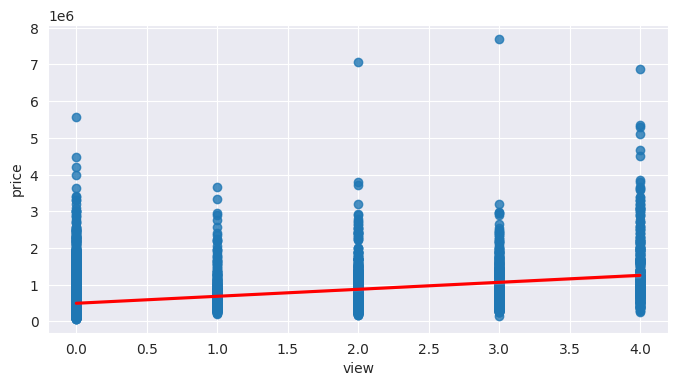

In [165]:

plt.figure(figsize=(8, 4))
sns.set_style("darkgrid")
sns.regplot(x=df1['view'], y=df1['price'], line_kws={'color': 'r'})

plt.show()

As casas mantem o preço de até 4, mesmo com as "views" altas. Ou seja, a qualidade da vista dos imóveis não  interfere significativamente no seu valor, o que confirma nossas analises anteriores

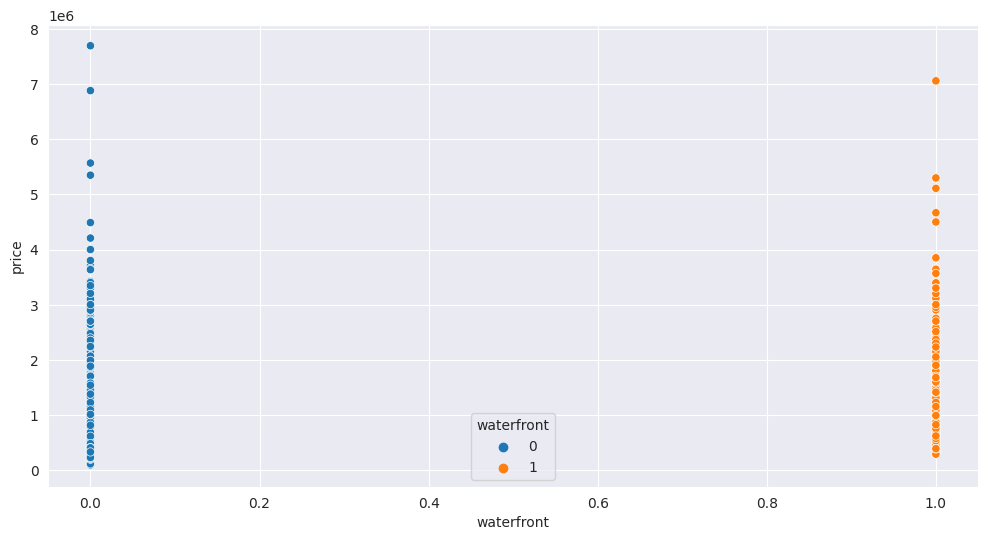

In [166]:
# "Waterfront" / "price"

plt.figure(figsize=(12, 6))

sns.scatterplot(x=df1['waterfront'],y=df1['price'], hue=df1['waterfront'])

plt.show()

sem vista para o mar = waterfront 0
com vista para o mar = waterfront 1

Independente dessa característica, os valores se mantêm entre 4.000.000

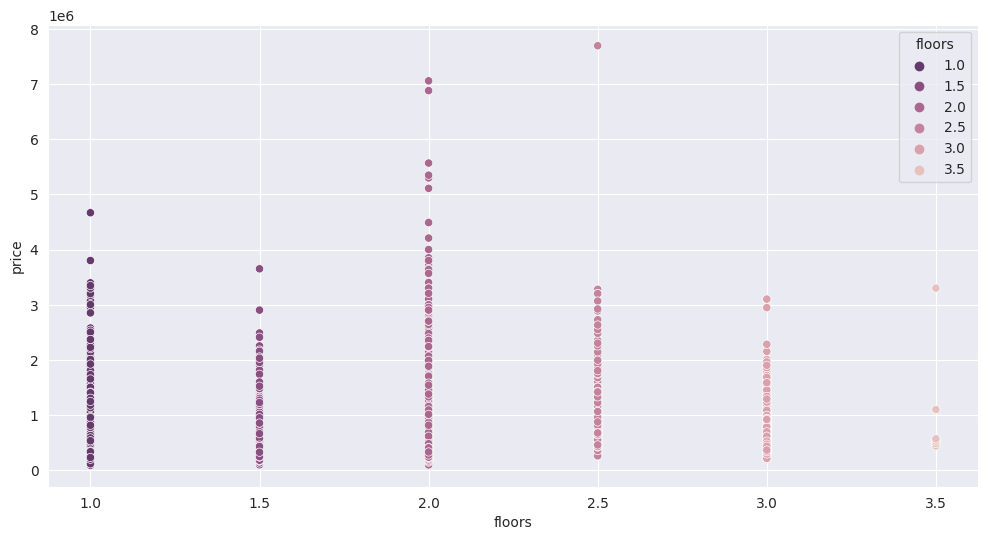

In [167]:
# "floors"/ "price"


plt.figure(figsize=(12, 6))

cmap = sns.cubehelix_palette(dark=.8, light=.3, as_cmap=True)
sns.scatterplot(x=df1['floors'], y=df1['price'], hue=df1['floors'], palette=cmap)

plt.show()

 O valor das casas se mantem em até 4.000.000. Independente do andar

In [168]:
# Anlisando a variável "yr_renovated"


df1['yr_renovated'].value_counts() 

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [169]:
df1 = df1.assign(renovated=(df1['yr_renovated'] > 0).astype(int))

In [170]:
# contagem dos imóveis que passaram por renovação - Renovated = 1
renovated = df1.groupby('renovated')['price'].count()
renovated

renovated
0    20699
1      914
Name: price, dtype: int64

In [171]:
# Mediana do preco das casas que foram renovadas e das que não foram
renovated_median = df1.groupby('renovated')['price'].median()
renovated_median

renovated
0    448000.0
1    600000.0
Name: price, dtype: float64

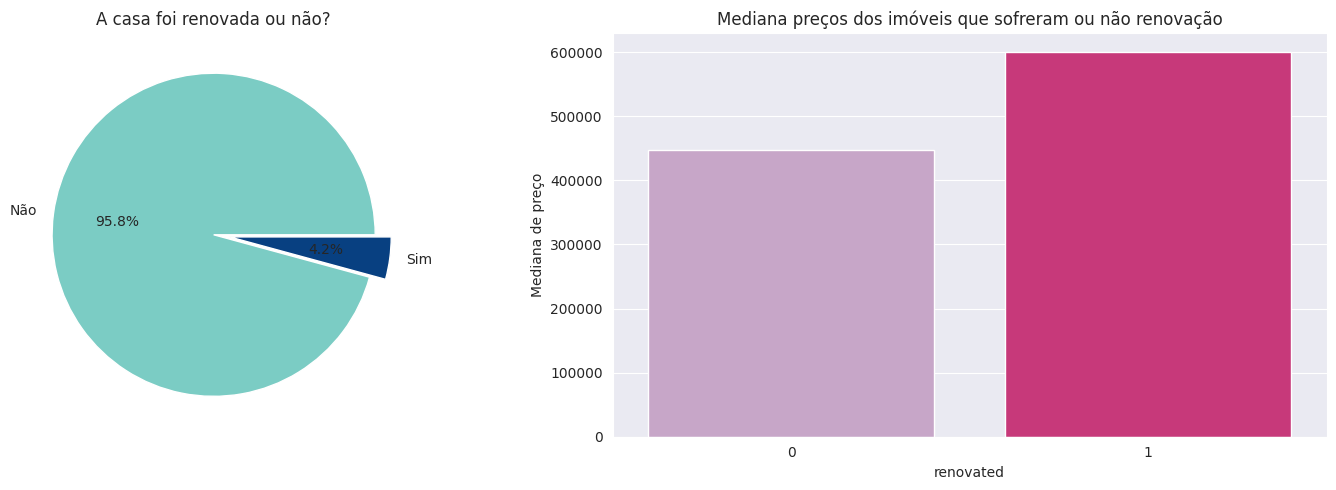

In [172]:
plt.figure(figsize=(15, 5))
        
plt.subplot(1, 2, 1)
plt.pie(renovated, explode = (0, 0.1), colors=['#7BCCC4', '#084081'], labels= ['Não', 'Sim'], autopct='%1.1f%%')
plt.title('A casa foi renovada ou não?')

plt.subplot(1, 2, 2)
sns.barplot(x=renovated.index, y = renovated_median, palette='PuRd')
plt.title('Mediana preços dos imóveis que sofreram ou não renovação')
plt.ylabel('Mediana de preço')

plt.tight_layout()
plt.show()

In [194]:
aumento_percentual = ((renovated_median[1] - renovated_median[0]) / renovated_median[0]) * 100
aumento_percentual

33.92857142857143

In [195]:
# Agrupando os preços das casas, para identificar a faixa de preço das mais vendidas e das menos vendidas
faixa_preco = pd.DataFrame(df1['price'], columns=['price'])
bins = [0, 250000, 500000, 1000000, 8000000]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
df1['price group'] = pd.cut(faixa_preco['price'], bins, labels = labels, include_lowest = True)
df1.sample(5)

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,decade_built,price group,month,year
719,719,4233400400,2015-04-14,267000.00,3,2.00,1300,9644,1.00,0,...,98010,47.31,-122.00,1430,9656,0,1991 - 2000,Group 2,4,2015
7272,7272,925059193,2014-07-09,1065000.00,4,3.75,4260,9800,2.00,0,...,98033,47.67,-122.17,1950,8970,0,2001 - 2010,Group 4,7,2014
12434,12434,1217000340,2014-06-06,185000.00,3,1.00,1840,8100,1.00,0,...,98166,47.45,-122.35,1250,8100,0,1951 - 1960,Group 1,6,2014
20981,20981,3746700120,2014-11-04,857326.00,3,3.50,3940,11632,2.00,0,...,98166,47.44,-122.34,2015,11632,0,2011 - 2015,Group 3,11,2014
5416,5416,9545250010,2014-11-07,785000.00,4,2.50,3270,9578,2.00,0,...,98027,47.54,-122.05,3120,8784,0,1991 - 2000,Group 3,11,2014


* Grupo 1: de 0 a 250000 dólares
* Grupo 2: de 250001 a 500000 dólares
* Grupo 3: de 500001 a 1000000 dólares
* Grupo 4: acima de 1000001 dólares


In [196]:
df1.groupby('price group')['price group'].count()

price group
Group 1     2433
Group 2    10127
Group 3     7588
Group 4     1465
Name: price group, dtype: int64

:A maioria dos imóveis vendidos se encontram na faixa de 250000 a 500000 dólares (grupos 2 e 3)

In [197]:
df1['date'] = pd.to_datetime(df1['date']) #convertendo para tipo de dado correto

df1['month'] = df1['date'].apply(lambda date:date.month) #criando uma nova coluna de mes
df1['year'] = df1['date'].apply(lambda date:date.year) #criando uma nova coluna de ano

print(df1.columns.values) #verificando se as colunas foram adicionadas corretamente

['index' 'id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living'
 'sqft_lot' 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15' 'renovated' 'decade_built' 'price group'
 'month' 'year']


<ipython-input-198-474b01b99c64>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



[Text(0.5, 0, 'Mês'),
 Text(0, 0.5, 'Preço'),
 Text(0.5, 1.0, 'Tendência dos preços dos imóveis ao longo do ano')]

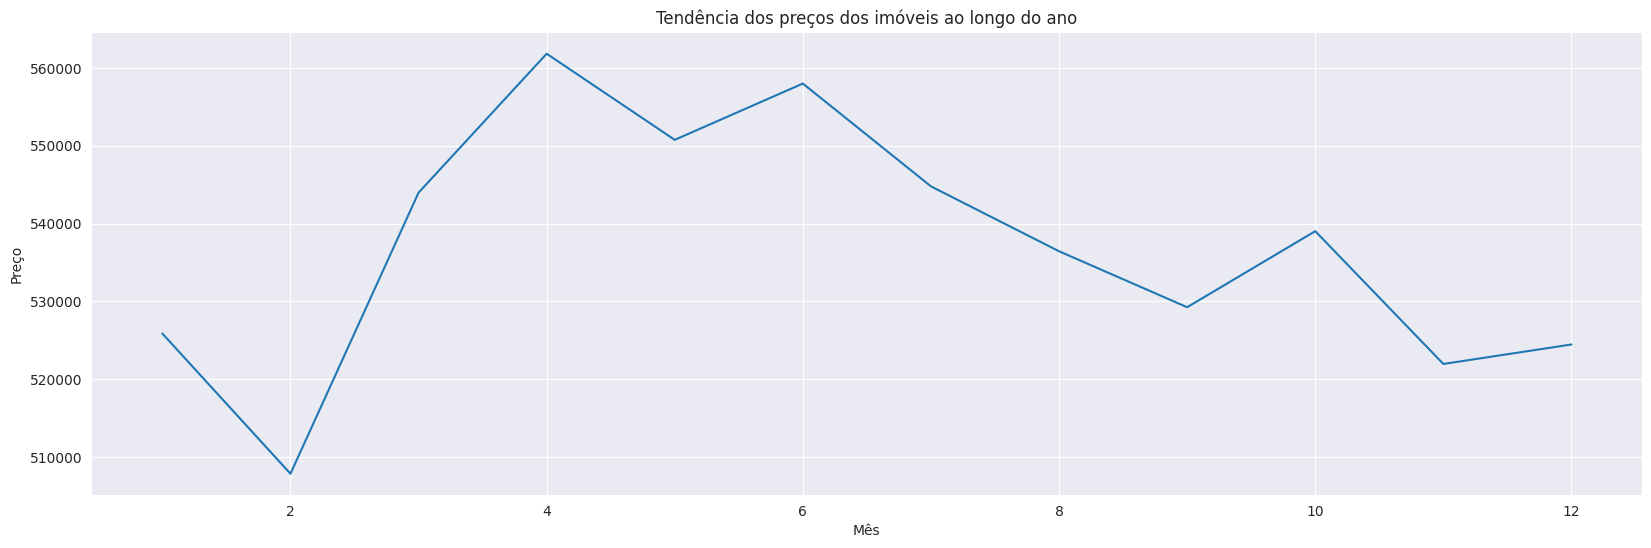

In [198]:
f, axe = plt.subplots(1, 1,figsize=(20,6))
df1.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Mês', ylabel='Preço', title='Tendência dos preços dos imóveis ao longo do ano')

É possível notar uma leve diminuição nas vendas entre novembro e janeiro, seguida por um aumento nos meses subsequentes. 
Essas variações podem estar relacionadas a fatores sazonais, como períodos de férias, feriados ou mudanças sazonais nas preferências dos compradores.

Assim, observando a tendência geral, o melhor momento para compra de imóveis seria entre o final e início do ano, e o melhor momento para venda seria entre fevereiro e junho, pois os preços estão mais altos e estáveis. Depois disso, começam a diminuir.

É importante lembrar que essas observações são baseadas na análise da tendência e não indicam necessariamente um padrão absoluto.

**DISTRIBUIÇÃO DO PREÇO POR LOCALIZAÇÃO**



*  Inserção de um novo dataframe contendo zipcode e nome do bairro (local)
*  Preço por bairro em gráfico de mapa
*  Média de preço por bairro em gráfico de barras



In [187]:
# Lendo o arquivo CSV com os dados de mapeamento de zipcode para local
zipcode_df= pd.read_csv('zipcode_location.csv', delimiter=";")

In [188]:
zipcode_df.head()

,zipcode,location
0,98001,Algona
1,98001,Auburn
2,98001,Federal Way
3,98002,Auburn
4,98003,Auburn


In [189]:
df_location = pd.merge(df1, zipcode_df, on="zipcode")

In [190]:
df_location.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,renovated,decade_built,price group,month,year,location
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,47.5112,-122.257,1340,5650,0,1951 - 1960,Group 1,10,2014,Seattle
1,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,47.5112,-122.257,1340,5650,0,1951 - 1960,Group 1,10,2014,Tukwila
2,117,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,...,47.5009,-122.248,1190,6780,0,1941 - 1950,Group 1,6,2014,Seattle
3,117,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,...,47.5009,-122.248,1190,6780,0,1941 - 1950,Group 1,6,2014,Tukwila
4,126,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,...,47.5091,-122.244,2660,8712,0,1961 - 1970,Group 2,7,2014,Seattle


In [191]:
import plotly.express as px

# Plotar os dados geoespaciais 
fig = px.scatter_mapbox(df_location, lat="lat", lon="long", hover_name="location",
                        color="price", zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

É perceptível que nas regiões mais centrais os preços são bem mais altos em comparação às regiões mais periféricas

In [192]:
# Calcular a média de preço por local
df_avg_price = df_location.groupby('location')['price'].mean().reset_index()

# Plotar o gráfico de barras
fig = px.bar(df_avg_price, x='location', y='price', color='location',
             labels={'location': 'Local', 'price': 'Média de Preço'},
             title='Média de Preço por Local')

fig.show()

In [193]:
# Defininindo a formatação dos números
pd.options.display.float_format = '{:.2f}'.format

# Ordenar os valores dos preços do maior para o menor
df_sorted = df_avg_price.sort_values(by='price', ascending=False)

print(df_sorted)

              location      price
24              Medina 2160606.60
39        Yarrow Point 1355927.08
8           Clyde Hill 1355927.08
2   Beaux Arts Village 1355927.08
15         Hunts Point 1355927.08
25       Mercer Island 1194230.02
3             Bellevue  898187.64
31           Sammamish  732711.46
16            Issaquah  672782.92
29             Redmond  667162.71
19            Kirkland  646374.25
13           Fall City  580526.79
38         Woodinville  569958.47
33             Seattle  534963.77
35          Snoqualmie  527961.20
37              Vashon  487479.63
5              Bothell  473850.18
17             Kenmore  462480.04
34           Shoreline  462414.77
26           Newcastle  459798.80
7            Carnation  455617.11
28          North Bend  439471.08
11              Duvall  424788.75
20    Lake Forest Park  423725.70
22        Lk Forest Pk  423725.70
21      Lk Forest Park  423725.70
4        Black Diamond  423665.99
30              Renton  403442.91
27       Norma

 Algumas áreas, como Beaux Arts Village, Clyde Hill, Hunts Point, Medina e Yarrow Point, apresentam preços muito mais altos em comparação com outras localidades. 

 Por outro lado, áreas como Algona, Auburn, Burien, Des Moines e Seatac podem ser consideradas de menor e preço mais acessível.

**CONCLUSÃO**

**INSIGHTS OBTIDOS:**

*   Grades das casas: • A maioria das casas possui uma classificação de grade média (7), Com relação à construção e design.

*   Renovação: • A maioria das casas não passou por renovação (yr_renovated), mas as que foram renovadas tendem a ter um valor de venda mais alto (33.92%).
Variação dos preços ao longo dos anos: • Os preços das casas mostram uma variação significativa entre as décadas de 1900 e 1961. A partir de 1961, os preços começam a aumentar. Casas construídas em décadas mais recentes tendem a ter preços mais altos, indicando que o mercado está valorizando imóveis mais novos.

*   Faixa de preço: A maioria dos imóveis vendidos se encontram na faixa de 250.000 a 500.000 dólares.

*   Localização: Algumas áreas, como Beaux Arts Village, Clyde Hill, Hunts Point, Medina e Yarrow Point, possuem preços mais altos, indicando alto padrão e valorização. Áreas como Algona, Auburn, Burien, Des Moines e Seatac possuem preços relativamente mais baixos e acessíveis.


*   Tendência: Não há tanta oscilação na quantidade de vendas mensal, mas há uma leve diminuição nas vendas entre novembro e janeiro, voltando a aumentar a partir de fevereiro, com pico de vendas em abril.

**Alta correlação com o preço:**

*   Grade (avaliação): Casas com uma classificação mais alta tendem a ter preços mais altos.

*   Quantidade de banheiros e tamanho das áreas: Características como o número de quartos, banheiros e espaço interior (sqft_living), área acima do nível do solo (sqft_above) e área interna das 15 casas mais próximas (sqft_living15) também influenciam positivamente o preço dos imóveis.

*   Localização: Áreas mais centrais possuem preços mais altos.

**Pouca correlação com o preço:**

A condição da casa (condition), beira-mar (waterfront), número de andares (floors) e a vista do imóvel (view) não possuem uma influência significativa no preço de venda.

**RESPONDENDO ÀS PERGUNTAS DE NEGÓCIO**

*Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?*

Como a estratégia da empresa é investir na compra e venda de imóveis com preços mais altos, para obter mais lucro, o ideal é investir nos que possuem melhor localização, maior área e melhor qualidade da construção e design.

*Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?*

O melhor momento para comprar é entre novembro e janeiro, e o melhor momento para vender é entre fevereiro e maio. 

*A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças?*

A decisão de fazer uma reforma deve ser baseada em uma análise cuidadosa dos custos em relação ao aumento esperado no preço. Caso valha a pena investir em uma reforma, o preço do imóvel geralmente aumenta em cerca de 33.92%. Sugestões de mudanças incluem melhorias na qualidade da construção e design, como atualização de acabamentos, renovação de banheiros e cozinha, e expansão da área interna, caso seja viável financeiramento.


